In [118]:
# Run if not on zumi
from PIL import Image
class Zumi(object):
    def __init__(self):
        print("Zumi Initialised")
    
    def forward(self):
        print("Zumi Forward")
        
    def reverse(self):
        print("Zumi Reverse")
        
    def turn_left(self, degree = 90, time = 2):
        print("Zumi Turn Left ", degree, " degrees")
        
    def turn_right(self, degree = 90, time = 2):
        print("Zumi Turn Right ", degree, " degrees")
        
    def forward(self, speed = 40, duration = 1):
        print("Zumi moved forward ", duration, " seconds")
        
    def get_all_IR_data(self):
        return np.random.randint(1,200, size=(6))
    
    def all_lights_on(self):
        print("Light set on!")

    def all_lights_off(self):
        print("Light set off!")
        
    def get_battery_percentage(self):
        return np.random.randint(70,100)
    
class Camera(object):
    def __init__(self):
        print("Camera Initialised")
        
    def capture(self):
        image = Image.open("images/"+random.choice(os.listdir("images")))
        return np.asarray(image)
    
    def clear_output(self):
        a = 1

    
zumi = Zumi()
camera = Camera()

Zumi Initialised
Camera Initialised


In [119]:
from random import randint
import math
import time

In [120]:
def getGlobalPos():
  return (randint(0,255),randint(0,255))

In [121]:
def getStation():
  return (randint(0,255),randint(0,255))

In [122]:
def getOffset(stationPos):
    offset = (-25, 0)
    return tuple(map(sum, zip(stationPos, offset))) 

In [123]:
def getCurrentPos(lastPos):
  drive = (randint(-10,10), randint(-10,10))
  return tuple(map(sum, zip(lastPos, drive))) 

In [124]:
def park():
    #zumi.turn_left(180)

    while(isLoading() == false):
        currentVoltage = zumi.get_battery_voltage()
        zumi.reverse()
        time.sleep(3)
        if(zumi.get_battery_voltage() > currentVoltage):
            return true
        else:
            return false

    print('loading')
    while(isFull() == false):
        print('.')
        time.sleep(10)

    zumi.forward()

In [126]:
def isFull():
    if(zumi.get_battery_percent == 100):
        return true
    else:
        return false

In [127]:
lastPos = getGlobalPos()
currentPos = getCurrentPos(lastPos)
stationPos = getStation()
offsetPos = getOffset(stationPos)

In [170]:
def turnDegree(lastPos, currentPos, stationPos, zumi):
  a = math.sqrt(pow(lastPos[0]-currentPos[0],2)+pow(lastPos[1]-currentPos[1],2))
  b = math.sqrt(pow(currentPos[0]-stationPos[0],2)+pow(currentPos[1]-stationPos[1],2))
  c = math.sqrt(pow(lastPos[0]-stationPos[0],2)+pow(lastPos[1]-stationPos[1],2))

  beta = math.degrees(math.acos((pow(a,2)+pow(b,2)-pow(c,2))/(2*a*b)))
  beta1 = 180-beta

  turningDirection = (stationPos[0]-lastPos[0])*(currentPos[1]-lastPos[1])-(stationPos[1]-lastPos[1])*(currentPos[0]-lastPos[0]) 
  if(turningDirection < 0):
    zumi.turn_left(beta1,3)
  elif(turningDirection > 0):
    zumi.turn_right(beta1, 3)
  else:
    if(b > c):
      zumi.turn_left(180, 3)
    else:
      #already in right angle to station
      zumi.all_lights_on()
      time.sleep(2)
      zumi.all_lights_off()    



In [194]:
def forwardLongDistance(start, target):
    offset = 20
    vel = 40
    distance = math.sqrt(pow(start[0]-target[0],2)+pow(start[1]-target[1],2)) - offset
    time = distance/vel * 1
    
    zumi.forward(speed=vel, duration=time)

In [236]:
def forwardCheckIntervall(target):
    maxDelta = 10
    time = 0.3
    targetReached = False
    
    #muss entfernt werden nach test
    pos = lastPos
    
    while not targetReached:
        #pos = getGlobalPos()
        if math.sqrt(pow(pos[0]-target[0],2)) <= maxDelta and math.sqrt(pow(pos[1]-target[1],2)) <= maxDelta:
            targetReached = True
        else:
            zumi.forward(duration=time)
            
            time.sleep(3)
            
            #Nur für Test, damit while verlassen wird
            if randint(0,2) < 1:
                pos = target

In [237]:
turnDegree(lastPos, currentPos, offsetPos, zumi)

Zumi Turn Right  103.63669778604991  degrees


In [238]:
forwardLongDistance(currentPos, offsetPos)

Zumi moved forward  2.5741868843647095  seconds


In [239]:
forwardCheckIntervall(offsetPos)

Zumi moved forward  0.3  seconds


In [240]:
turnDegree(currentPos, offsetPos, stationPos, zumi)

Zumi Turn Left  148.63669778604992  degrees


In [ ]:
zumi.park()

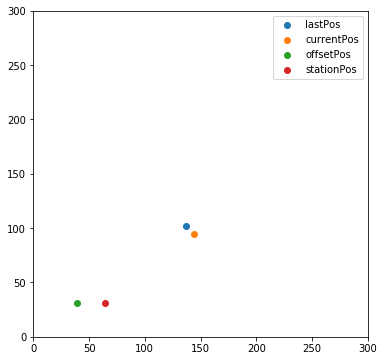

In [241]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

point1 = plt.scatter(lastPos[0], lastPos[1], label="lastPos")
point2 = plt.scatter(currentPos[0], currentPos[1])
point3 = plt.scatter(offsetPos[0], offsetPos[1])
point4 = plt.scatter(stationPos[0], stationPos[1])
plt.legend((point1, point2, point3, point4), ('lastPos', 'currentPos', 'offsetPos', 'stationPos'))
plt.xlim(0, 300)
plt.ylim(0, 300)
plt.show()